Procesamiento de EDA para analizar los datos, y preparación para hacer un modelo de 

Como Primer Paso importamos las librerias que vamos a utilizar 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import ast


Empezamos leyendo el datasets steam games worked

In [3]:
df_steam_games = pd.read_csv('../datasets/steam_games_worked.csv.gz')

In [4]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31994 entries, 0 to 31993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     28766 non-null  object 
 1   genres        31994 non-null  object 
 2   app_name      31993 non-null  object 
 3   title         29946 non-null  object 
 4   release_date  29929 non-null  object 
 5   price         30638 non-null  float64
 6   id            31994 non-null  int64  
 7   year          29755 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ MB


In [5]:
df_steam_games[['price','year']].describe()
## El año va entre 1989 y 2021

,price,year
count,30638.000000,29755.000000
mean,8.907350,2014.763502
std,16.352539,3.511544
min,0.000000,1970.000000
25%,2.990000,2014.000000
50%,4.990000,2016.000000
75%,9.990000,2017.000000
max,995.000000,2021.000000


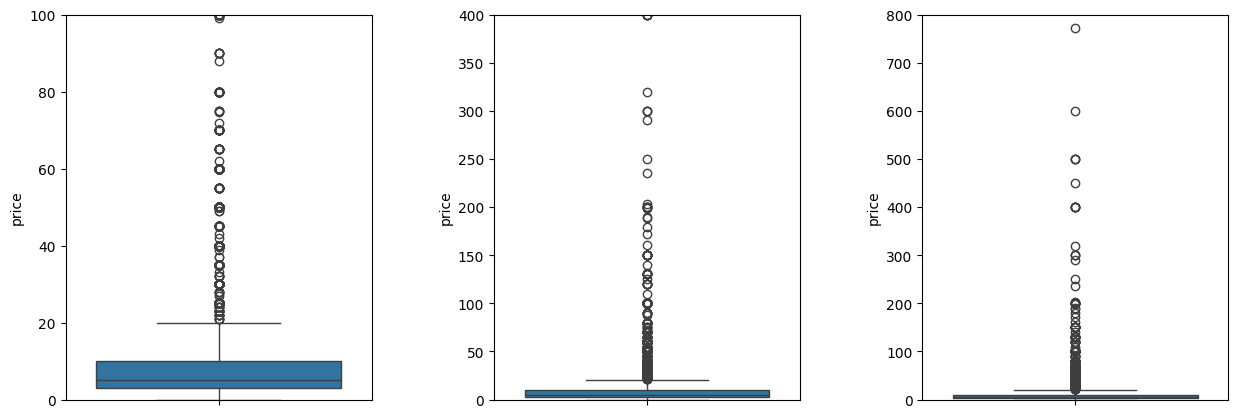

In [6]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df_steam_games, y='price', ax=ax[0])
sns.boxplot(data=df_steam_games, y='price', ax=ax[1])
sns.boxplot(data=df_steam_games, y='price', ax=ax[2])
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 800)

plt.subplots_adjust(wspace=0.4)
plt.show()


En el anterior gráfico se observa que la columna "price" contiene muchos valores atípicos que van desde valores bajos hasta valores muy altos, incluso superando los 20 y llegando hasta los 1000. Sin embargo, en una aplicación de juegos, esta distribución de precios no necesariamente indica valores atípicos, ya que es común encontrar una amplia variedad de precios para juegos, desde aquellos que son muy económicos hasta otros que pueden ser considerablemente más caros. Por lo tanto, en el contexto de una aplicación de juegos, esta distribución de precios no requeriría un tratamiento especial, ya que refleja la diversidad de precios que se encuentra comúnmente en este tipo de productos.

In [12]:
df_steam_games.head()

,publisher,genres,app_name,title,release_date,price,id,year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,2018.0
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,0.00,643980,2018.0
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,0.00,670290,2017.0
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017-12-07,0.99,767400,2017.0
4,NaN,"['Action', 'Indie', 'Casual', 'Sports']",Log Challenge,NaN,NaN,2.99,773570,NaN


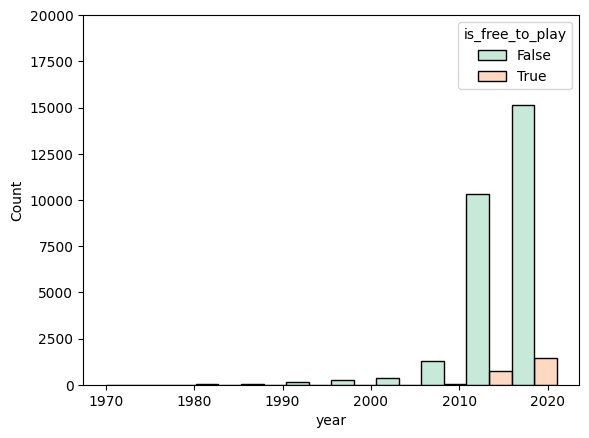

In [22]:
df_steam_games['is_free_to_play'] = df_steam_games['genres'].apply(lambda x: 'Free to Play' in x)


sns.histplot(data=df_steam_games,x='year',hue='is_free_to_play',bins=10,palette='Pastel2',multiple='dodge')

plt.ylim(0,20000)
plt.show()

Análisis de géneros de videojuegos en el data frame Steam games

Este análisis tiene como objetivo explorar la distribución de géneros de videojuegos en la plataforma de distribución digital Steam. Para esto, se utilizará el conjunto de datos df_steam_games, que contiene información sobre juegos disponibles en Steam, incluyendo sus géneros.

Exploración inicial: Se comenzará por explorar la estructura del DataFrame df_steam_games y revisar las primeras filas para entender cómo están organizados los datos.
Preparación de datos:La columna 'genres' contiene listas de géneros a los que pertenece cada juego. Estas listas se desplegarán para crear filas individuales por cada género, de modo que cada juego aparezca múltiples veces, una por cada género al que pertenece.
Conteo de videojuegos por género: Se realizará un conteo de la cantidad de videojuegos por cada género único para entender la distribución de géneros en la plataforma.
Visualización:

Se creará una gráfica de barras para visualizar la cantidad de videojuegos por género, proporcionando una perspectiva clara de la distribución de géneros en Steam.

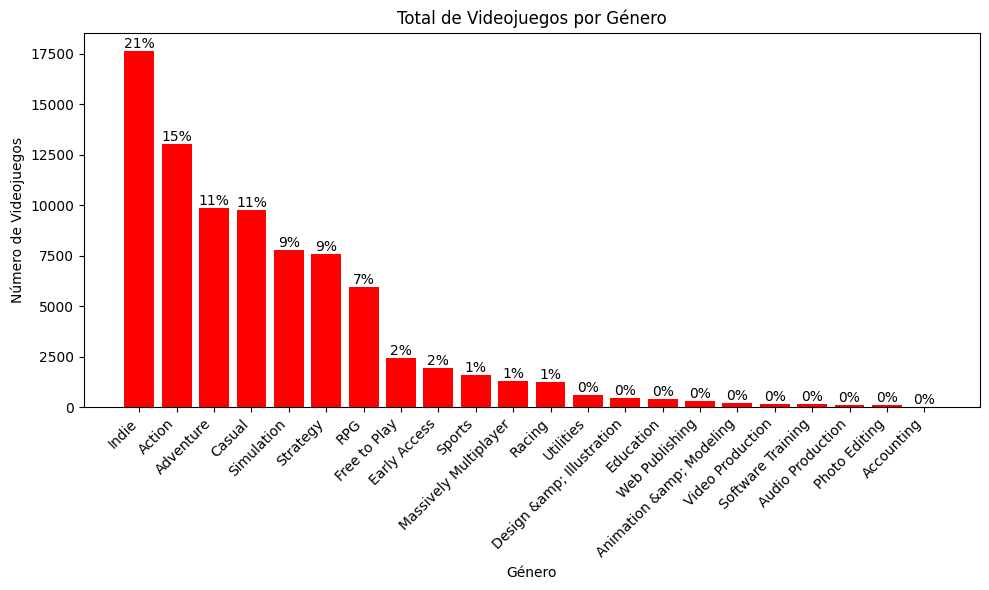

In [27]:
# Supongamos que df_steam_games es tu DataFrame original
df_steam_games_explode = df_steam_games.copy()  # Copiar el DataFrame original para evitar modificarlo

# Convertir las listas de la columna 'genres' en nuevas filas
df_steam_games_explode = df_steam_games_explode.explode('genres')

# Contar los videojuegos por género único
gnr_counts = df_steam_games_explode['genres'].value_counts()

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(gnr_counts.index, gnr_counts, color='red')

# Añadir etiquetas con porcentajes
tol_videojuegos = gnr_counts.sum()
porcentajes = (gnr_counts / tol_videojuegos) * 100
for bar, porcentaje in zip(bars, porcentajes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(porcentaje)}%', ha='center', va='bottom')

plt.title('Total de Videojuegos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Videojuegos')
plt.xticks(rotation=45, ha='right')  # Para mejorar la legibilidad de las etiquetas en el eje x
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Analisis de las opiniones por categoría de análisis de sentimiento y recomendacion 

In [28]:
user_review = pd.read_csv('../datasets/user_reviews_worked.csv.gz')

In [29]:
user_review.sample(5)

,user_id,posted,item_id,recommend,sentiment_analysis,year
14790,76561198126411307,"Posted May 27, 2014.",263500,True,1,2014.0
48790,yoshi278,"Posted July 9, 2014.",201810,True,2,2014.0
42102,OfficialvnmZz,"Posted August 4, 2015.",252950,True,2,2015.0
54382,76561198085050651,"Posted June 14, 2014.",220,True,1,2014.0
30848,herio,"Posted April 9, 2014.",251430,True,2,2014.0


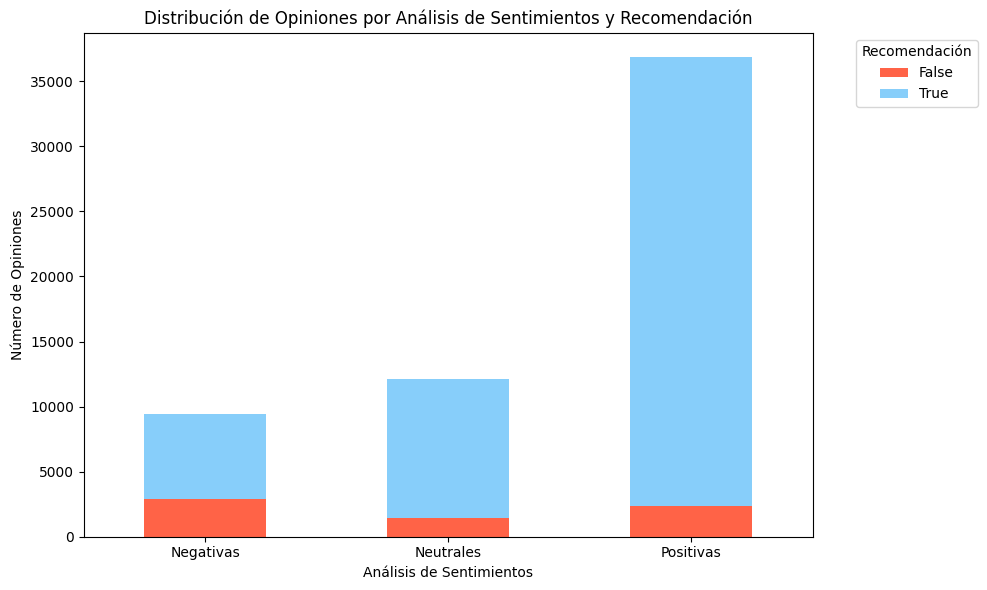

In [30]:
# Contar las opiniones por categoría de análisis de sentimientos y recomendación
opinions_count = user_review.groupby(['sentiment_analysis', 'recommend']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
opinions_count.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF6347', '#87CEFA', '#32CD32'])
plt.title('Distribución de Opiniones por Análisis de Sentimientos y Recomendación')
plt.xlabel('Análisis de Sentimientos')
plt.ylabel('Número de Opiniones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'], rotation=0)
plt.legend(title='Recomendación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


El gráfico de barras apiladas muestra la distribución de opiniones (negativas, neutrales y positivas) según el análisis de sentimientos y la recomendación asociada en las reseñas de usuarios. Cada barra representa una categoría de análisis de sentimientos (negativo, neutral, positivo), y cada segmento de barra representa la cantidad de opiniones para esa categoría de análisis de sentimientos y recomendación. La importancia de este gráfico radica en su capacidad para visualizar la distribución de opiniones de manera clara y comparativa, lo que permite identificar patrones y tendencias en las reseñas de usuarios en función de su análisis de sentimientos y recomendación asociada. Esta visualización es útil para comprender la percepción general de los usuarios sobre un producto o servicio, así como para identificar áreas de mejora o fortaleza en base a las opiniones expresadas.

## Users Items

In [31]:
with gzip.open('../datasets/user_items_worked.csv.gz', 'rb') as f:
    user_items_proc = pd.read_csv(f, encoding='utf-8')

In [32]:
user_items_proc.sample(5)

,item_id,user_id,playtime_forever
401496,218230,SpaghettiNoodles,0.0
27938,304930,76561198071175142,2645.0
762216,222900,76561198072734711,238.0
850268,270170,agenteagle,0.0
924689,201790,conco_gg,51.0


In [33]:
user_items_proc['playtime_forever'].describe()

count    5.153209e+06
mean     9.914951e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

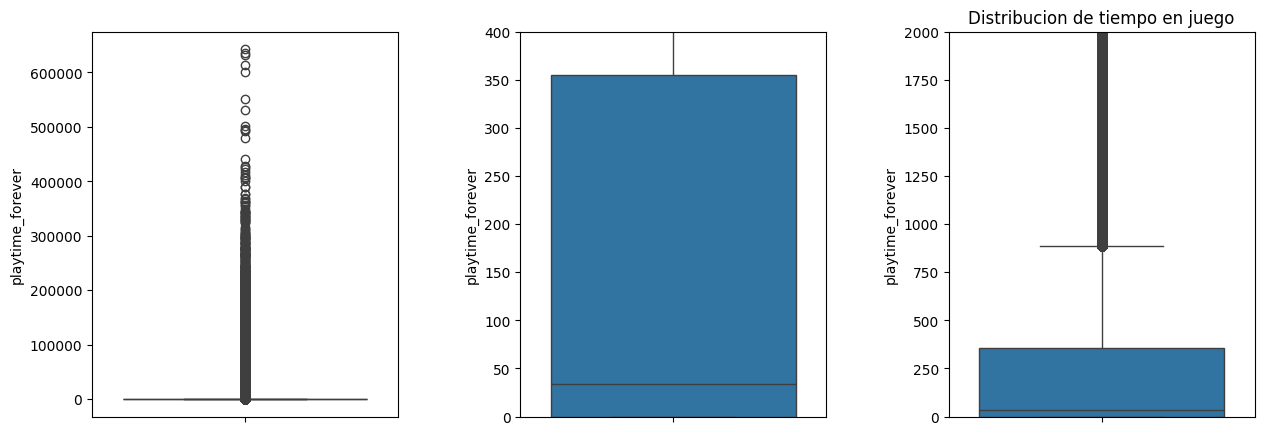

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[0])
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[1])
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[2])
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 2000)
plt.title('Distribucion de tiempo en juego')
plt.subplots_adjust(wspace=0.4)
plt.show()


El primer gráfico de caja muestra la distribución completa del tiempo de juego para todas las condiciones sin ningún límite en el eje y.
El segundo gráfico de caja tiene un límite superior en el eje y de 400, lo que sugiere que se está enfocando en una subsección de datos con valores de tiempo de juego más bajos.
El tercer gráfico de caja tiene un límite superior en el eje y de 2000, lo que sugiere que se está enfocando en una subsección de datos con valores de tiempo de juego más altos.
En resumen, esta visualización proporciona una manera eficaz de comparar la distribución del tiempo de juego entre diferentes condiciones, destacando las diferencias en las distribuciones y los valores atípicos en cada conjunto de datos. El ajuste de los límites del eje y en los gráficos individuales permite un análisis más detallado de diferentes rangos de valores de tiempo de juego.

Hay valores atipicos de playtime_forever pero solo se hara un tratado si se encuentra un valor que supere la cantidad de minutos entre que salio el juego y la fecha actual. 

La fusión de DataFrames permite combinar información relevante de diferentes fuentes de datos en un solo DataFrame, lo que facilita el análisis posterior.
La verificación de valores erróneos en la columna 'playtime_forever' es importante para asegurarse de que los datos sean consistentes y que no haya errores o anomalías que puedan afectar los análisis posteriores.
En este caso, el hecho de que valores_playtime_erroneos esté vacío indica que no se encontraron valores erróneos, lo que sugiere que los datos de tiempo de juego son coherentes con la edad de los juegos y están listos para su análisis.

In [38]:

# Unimos los dataframes 'steam_games' y 'user_items_proc' basado en 'id' y 'item_id' respectivamente.
games_users = pd.merge(df_steam_games[['id','year']], user_items_proc[['item_id','playtime_forever']], left_on='id', right_on='item_id', how='inner')

# Buscamos los valores erróneos en la columna 'playtime_forever' donde el tiempo de juego es mayor que la edad del juego en minutos
# Suponemos que cada año tiene 365 días, cada día 24 horas, cada hora 60 minutos
valores_playtime_erroneos = games_users[(2021 - games_users['year'])*365*24*60 < games_users['playtime_forever']]

valores_playtime_erroneos # Como se ve es vacio, significa que no hay valores erróneos.
valores_playtime_erroneos # Como se ve es vacio.

,id,year,item_id,playtime_forever


Top 10 Juegos Más Jugados por Horas de Juego

C:\Users\Willc\AppData\Local\Temp\ipykernel_20436\3710121964.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_games.head(10), x='playtime_forever', y='title', palette='viridis')


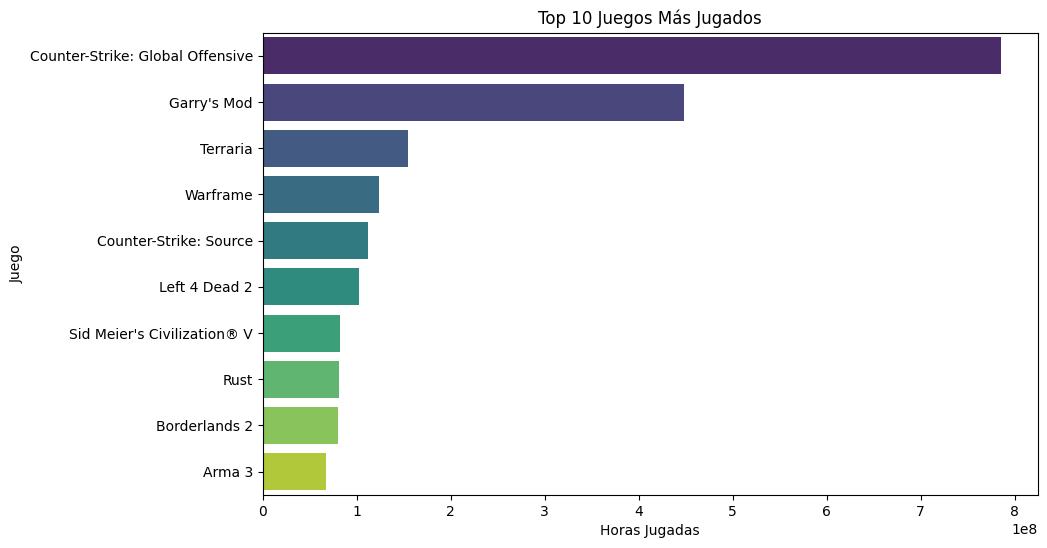

In [42]:
df_merge = pd.merge(df_steam_games,user_items_proc ,left_on='id', right_on='item_id' )

top_games = df_merge.groupby('title')['playtime_forever'].sum().reset_index()#agrupamos los valores por titulo y suma las horaas jugadas

top_games = top_games.sort_values('playtime_forever', ascending=False)#ordenamos de mayor a menor

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_games.head(10), x='playtime_forever', y='title', palette='viridis')
plt.title('Top 10 Juegos Más Jugados')
plt.xlabel('Horas Jugadas')
plt.ylabel('Juego')
plt.show()



El gráfico resultante muestra de manera clara y concisa los 10 juegos más jugados, permitiendo una fácil comparación de las horas jugadas entre ellos. Esto puede ser útil para identificar los juegos más populares en función del tiempo dedicado por los usuarios, lo que puede ser relevante para decisiones relacionadas con el desarrollo de juegos, estrategias de marketing, entre otros.